In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.compose
import sklearn.neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_path = 'all_books_data.csv'
book_data = pd.read_csv(csv_path)
book_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,category_name
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17.0,2009,Non Fiction,NaN
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5.0,2009,Non Fiction,NaN
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13.0,2009,Fiction,NaN
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14.0,2009,Non Fiction,NaN
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4.0,2009,Fiction,NaN


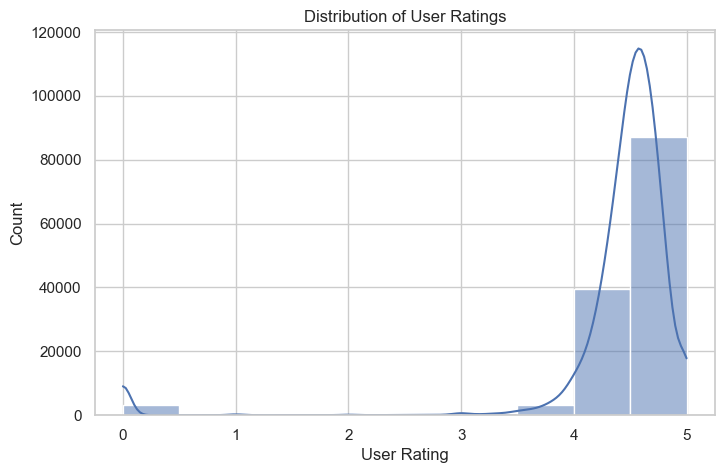

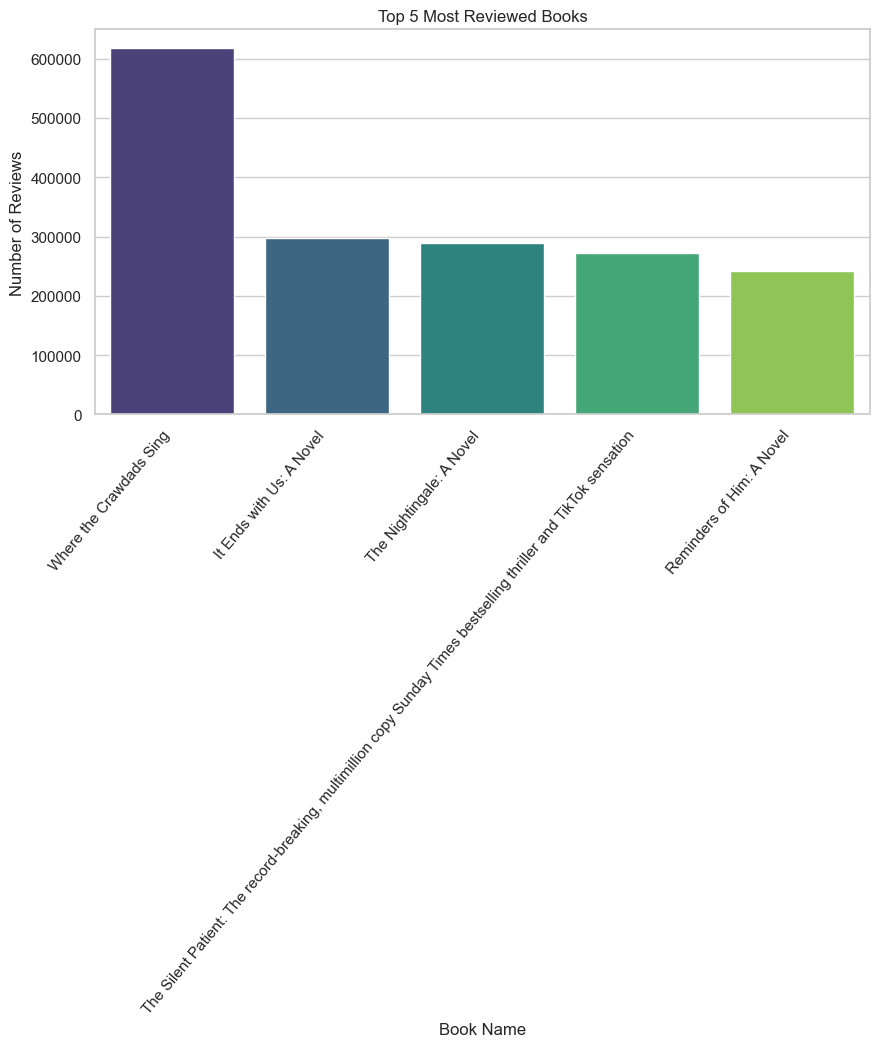

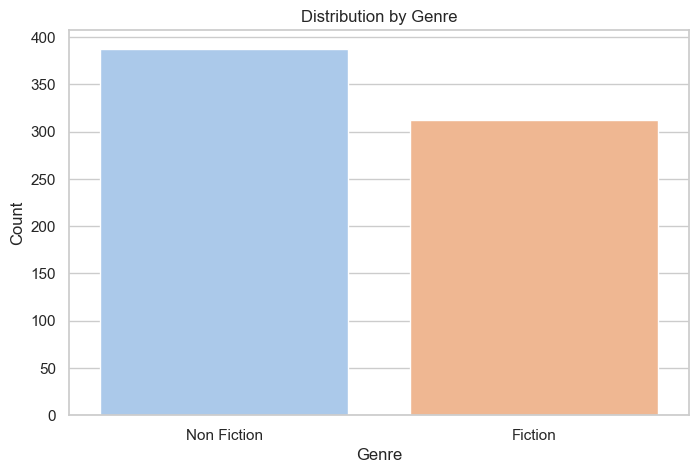

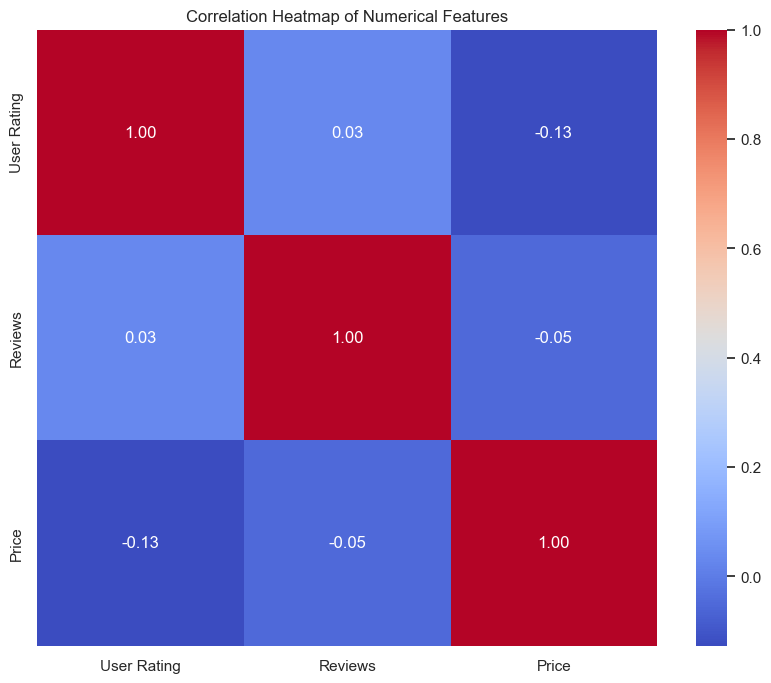

(Name                  0
 Author              425
 User Rating           0
 Reviews               0
 Price                 0
 Year              49019
 Genre            133102
 category_name       700
 dtype: int64,
 Name              object
 Author            object
 User Rating      float64
 Reviews            int64
 Price            float64
 Year              object
 Genre             object
 category_name     object
 dtype: object,
                                Name           Author    User Rating  \
 count                        133802           133377  133802.000000   
 unique                       132151            72866            NaN   
 top     The Very Hungry Caterpillar  James Patterson            NaN   
 freq                             12              215            NaN   
 mean                            NaN              NaN       4.405324   
 std                             NaN              NaN       0.744055   
 min                             NaN              NaN    

In [4]:
missing_data = book_data.isna().sum()
data_types = book_data.dtypes

summary_stats = book_data.describe(include='all')

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(book_data['User Rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.show()

top_reviewed = book_data.sort_values(by='Reviews', ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_reviewed, x='Name', y='Reviews', palette='viridis')
plt.title('Top 5 Most Reviewed Books')
plt.xlabel('Book Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=book_data, x='Genre', palette='pastel')
plt.title('Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = book_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

missing_data, data_types, summary_stats


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
book_data_cleaned = book_data.dropna(subset=['User Rating', 'Reviews', 'Price', 'Genre', 'Author'])

features = ['Reviews', 'Price', 'Genre', 'Author']
target = 'User Rating'

X = book_data_cleaned[features]
y = book_data_cleaned[target]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Author']),
    ('num', StandardScaler(), ['Reviews', 'Price'])
])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.03274202996517953, 0.40563319102581374)

In [6]:
predicted_ratings = model_pipeline.predict(X)

book_data_cleaned['Predicted Rating'] = predicted_ratings

top_books = book_data_cleaned.sort_values(by='Predicted Rating', ascending=False).head(5)
top_books[['Name', 'Author', 'Predicted Rating']]


,Name,Author,Predicted Rating
558,Dog Man: Grime and Punishment: A Graphic Novel...,Dav Pilkey,4.932885
645,The Very Hungry Caterpillar,Eric Carle,4.922767
693,The Very Hungry Caterpillar,Eric Carle,4.922767
592,The Very Hungry Caterpillar,Eric Carle,4.922767
663,Little Blue Truck's Valentine,Alice Schertle,4.914808
